In [4]:
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt

In [5]:
message = 'hello'
data = message.encode('utf-8')
data_bits = np.unpackbits(np.frombuffer(data, dtype=np.uint8))
data_bits.dtype = np.int8
data_bits = 2*data_bits - 1
data_bits

array([-1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1,
        1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1, -1,  1,  1,  1,  1], dtype=int8)

In [ ]:
def get_str_as_bits(s: str, encode: str = 'utf-8') -> np.ndarray:
    """
    Convert a string to a numpy array of bits (0s and 1s).
    
    Parameters:
    -----------
    s : str
        The input string to convert
    encode : str, optional
        The encoding to use, by default 'utf-8'
    
    Returns:
    --------
    np.ndarray
        A 1D numpy array containing the binary representation (0s and 1s)
    """
    # Convert string to bytes using the specified encoding
    byte_data = s.encode(encode)
    # Convert bytes to uint8 array
    uint8_array = np.frombuffer(byte_data, dtype=np.uint8)
    # Unpack uint8 array to bits
    bit_array = np.unpackbits(uint8_array)
    return bit_array

def bits_to_symbols(bits: np.ndarray, symbol_alphabet: np.ndarray) -> np.ndarray:
    """
    Convert an array of bits to symbols using a custom alphabet.
    
    Parameters:
    -----------
    bits : np.ndarray
        Array of bits (0s and 1s)
    symbol_alphabet : np.ndarray
        Array of complex symbols to use as the alphabet.
        The length must be a power of 2.
    
    Returns:
    --------
    np.ndarray
        Array of complex symbols
    """
    # Verify that symbol_alphabet length is a power of 2
    n_symbols = len(symbol_alphabet)
    if n_symbols & (n_symbols - 1) != 0:
        raise ValueError("Symbol alphabet length must be a power of 2")
    
    # Calculate how many bits per symbol
    bits_per_symbol = int(np.log2(n_symbols))
    
    # Pad bits if necessary to make it divisible by bits_per_symbol
    remainder = len(bits) % bits_per_symbol
    if remainder != 0:
        pad_length = bits_per_symbol - remainder
        bits = np.append(bits, np.zeros(pad_length, dtype=bits.dtype))
    
    # Reshape bits into groups
    bit_groups = bits.reshape(-1, bits_per_symbol)
    
    # Convert bit groups to indices (binary to decimal conversion)
    powers = 2 ** np.arange(bits_per_symbol - 1, -1, -1)
    indices = np.sum(bit_groups * powers, axis=1).astype(int)
    
    # Map indices to symbols
    symbols = symbol_alphabet[indices]
    
    return symbols

def str_to_symbols(s: str, symbol_alphabet: np.ndarray, encode: str = 'utf-8') -> np.ndarray:
    """
    Convert a string directly to symbols using a custom alphabet.
    
    Parameters:
    -----------
    s : str
        The input string to convert
    symbol_alphabet : np.ndarray
        Array of complex symbols to use as the alphabet.
        The length must be a power of 2.
    encode : str, optional
        The encoding to use, by default 'utf-8'
    
    Returns:
    --------
    np.ndarray
        Array of complex symbols
    """
    bits = get_str_as_bits(s, encode)
    return bits_to_symbols(bits, symbol_alphabet)

# 16-QAM alphabet example
def create_qam16_alphabet():
    """Create a 16-QAM constellation."""
    real_parts = np.array([-3, -1, 1, 3])
    imag_parts = np.array([-3, -1, 1, 3])
    real_grid, imag_grid = np.meshgrid(real_parts, imag_parts)
    return (real_grid.flatten() + 1j * imag_grid.flatten()) / np.sqrt(10)  # Normalized

In [ ]:
# 64-QAM alphabet example
def create_qam64_alphabet():
    """Create a 64-QAM constellation."""
    real_parts = np.array([-7, -5, -3, -1, 1, 3, 5, 7])
    imag_parts = np.array([-7, -5, -3, -1, 1, 3, 5, 7])
    real_grid, imag_grid = np.meshgrid(real_parts, imag_parts)
    return (real_grid.flatten() + 1j * imag_grid.flatten()) / np.sqrt(42)  # Normalized

In [10]:
# Example with QPSK (4 symbols = 2 bits per symbol)
qpsk_alphabet = np.array([1+1j, -1+1j, -1-1j, 1-1j])
qpsk_symbols = str_to_symbols("hello", qpsk_alphabet)

# Example with 8-PSK (8 symbols = 3 bits per symbol)
psk8_alphabet = np.exp(1j * np.arange(0, 2*np.pi, 2*np.pi/8))
psk8_symbols = str_to_symbols("hello", psk8_alphabet)

# Example with 16-QAM (16 symbols = 4 bits per symbol)
qam16_alphabet = create_qam16_alphabet()
qam16_symbols = str_to_symbols("hello", qam16_alphabet)

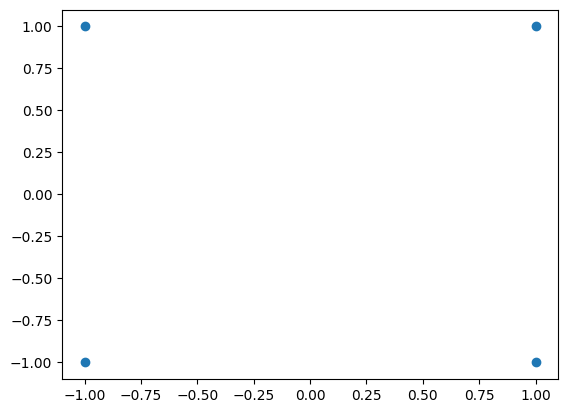

In [11]:
plt.scatter(qpsk_alphabet.real, qpsk_alphabet.imag)

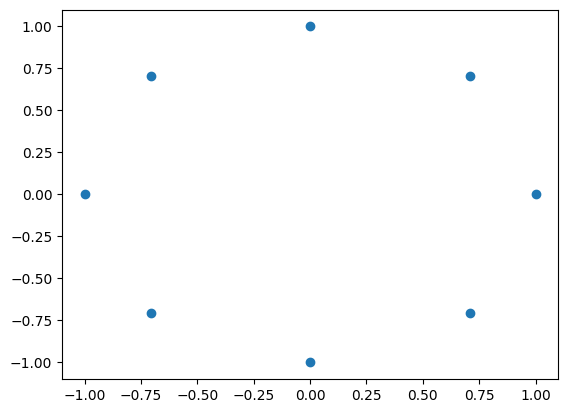

In [12]:
plt.scatter(psk8_alphabet.real, psk8_alphabet.imag)